Rough outline for cleaning:
1. See what is available
2. shrink memory footprint 
    by casting columns to different data types: 
        a. text to category where appropriate, 
        b. timestamp string to pandas datetimestamp.
3. look for outliers/bad data and drop rows that don't make sense

In [1]:
#import dependencies
import UDFs as u #User Defined Functions = UDFs
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#Set file names for input and output. Change the name of file to choose a different file

infile  = 'Data/202010-citibike-tripdata.csv'
outfile = 'Data/202010-citibike_processed.csv'

In [3]:
df = pd.read_csv(infile)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248869 entries, 0 to 2248868
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 257.4+ MB


In [4]:
u.column_metadata(df)

,Column Name,Unique,Data Type,Memory Usage
0,tripduration,14364,int64,17991080
1,starttime,2247222,object,182158517
2,stoptime,2247175,object,182158517
3,start station id,1144,int64,17991080
4,start station name,1144,object,173041452
5,start station latitude,1144,float64,17991080
6,start station longitude,1142,float64,17991080
7,end station id,1163,int64,17991080
8,end station name,1163,object,173072676
9,end station latitude,1163,float64,17991080


In [5]:
# make time columns timestamp instead of object to streamline memory usage. Station Name and usertype could be replaced to category
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [6]:
#Applying 'category' data type to string columns

category_columns = ['start station name', 'end station name', 'bikeid', 'usertype', 'gender']
for col in category_columns:
    df[col] = df[col].astype('category')

In [7]:
u.column_metadata(df)  #note that the now category columns take up far less memory than in first version of df.

,Column Name,Unique,Data Type,Memory Usage
0,tripduration,14364,int64,17991080
1,starttime,2247222,datetime64[ns],17991080
2,stoptime,2247175,datetime64[ns],17991080
3,start station id,1144,int64,17991080
4,start station name,1144,category,4628403
5,start station latitude,1144,float64,17991080
6,start station longitude,1142,float64,17991080
7,end station id,1163,int64,17991080
8,end station name,1163,category,4629731
9,end station latitude,1163,float64,17991080


<Figure size 432x288 with 0 Axes>

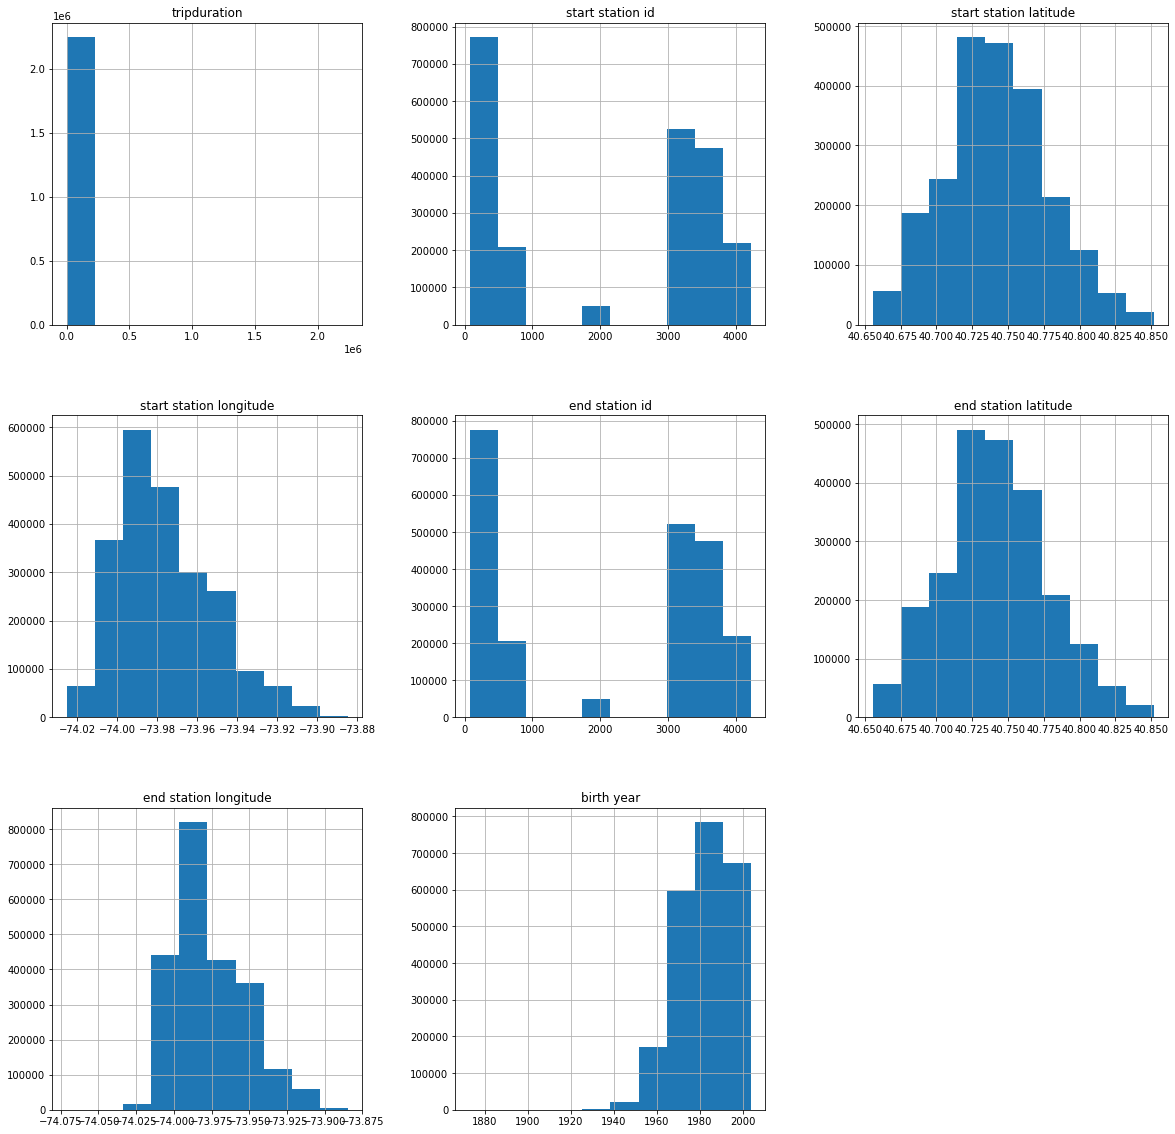

In [8]:
# Build histograms to profile data fields
fig=plt.figure()
df.hist(figsize=(20,20))
plt.show()

### Histograms Observations
* start/end station data look good, showing symmetry between the distributions for lat, lon, & station ID.
* birth year and trip duration are extremely skewed. These two will have to be explored further. 

In [9]:
#pull most frequent value from birth year, and report the percentage of records occupied by this value.
print(u.greatest_frequency(df, 'birth year'))



The value 1969 appears in the column 263,400 times, comprising 12% of all the records


In [10]:
df1, out_string = u.strip_high_fliers(df, 'tripduration')

In [11]:
print(out_string)

There are 95,256 out of 2,248,869 outliers, or 4%. These records will be excluded from analysis


In [12]:
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1403,2020-10-01 00:00:10.787,2020-10-01 00:23:34.540,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1
1,462,2020-10-01 00:00:18.239,2020-10-01 00:08:00.571,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2
2,770,2020-10-01 00:00:21.307,2020-10-01 00:13:12.084,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,47398,Customer,1996,1
3,233,2020-10-01 00:00:25.008,2020-10-01 00:04:18.641,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1
4,126,2020-10-01 00:00:25.310,2020-10-01 00:02:32.133,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1


In [13]:
df1.to_csv(outfile)   #write processed df to csv

In [ ]:
u.